In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


def team_to_int_dict():
    teams = list(Game.objects.all().values_list('team', flat=True).distinct())
    return {team:teams.index(team) for team in teams}

team_ids = team_to_int_dict()

def prep_qb_stats(player_list):
    pass_attempts = np.array([stat.pass_attempts for stat in player_list])
    pass_completions = np.array([stat.pass_completions for stat in player_list])
    pass_yards = np.array([stat.pass_yards for stat in player_list])
    pass_touchdowns = np.array([stat.pass_touchdowns for stat in player_list])
    return pass_attempts, pass_completions, pass_yards, pass_touchdowns

def prep_model_input(player_list):
    return np.array([[team_ids[stat.game.team], stat.game.home] 
                      for stat in player_list])

def run_model(train_input, train_answer, test_input, test_answer):
    rfc = RandomForestClassifier ()
    rfc.fit(train_input, train_answer)
    predicted = rfc.predict(test_input)
    
    plt.figure(figsize=(13,7))
    plt.plot(test_answer)
    plt.plot(predicted)
    return accuracy_score(test_answer, predicted)


def get_train_test_players():
    train_players = PlayerData.objects.filter(game__week__lte=13)
    test_players = PlayerData.objects.filter(game__week=14)
    return train_players, test_players

train_players, test_players = get_train_test_players()

0.017699115044247787

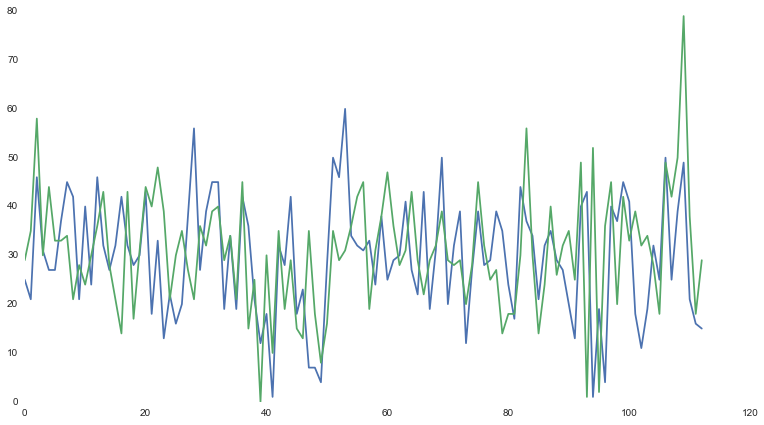

In [2]:
train_input = prep_model_input(train_players)
test_input = prep_model_input(test_players)

train_pass_attempts, train_pass_completions, train_pass_yards, train_pass_touchdowns = prep_qb_stats(train_players)
test_pass_attempts, test_pass_completions, test_pass_yards, test_pass_touchdowns = prep_qb_stats(test_players)

run_model(train_input, train_pass_attempts, test_input, test_pass_attempts)

In [4]:
final_dict = train_players[0].to_dict()
final_dict = {stat_name:[] for stat_name in final_dict.keys()}
for player in train_players:
    player_dict = player.to_dict()
    for stat in final_dict.keys():
        final_dict[stat].append(player_dict[stat])

In [5]:
final_dict

{'interceptions': [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  2,
  3,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  2,
  1,
  0,
  1,
  1,
  2,
  1,
  3,
  1,
  4,
  1,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  3,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  2,
  3,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  3,
  3,
  0,
  2,
  1,
  0,
  0,
  0,
  2,
  2,
  2,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  2,
  1,
  0,
  1,
  0,
  0,
  2,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  4,
  1,
  0,
  2,
  1,
  0,
  1,
  2,
  2,
  1,
  0,
  0,
  1,
  3,
  3,
  0,
  1,
  2,
  2,
  2,
  0,
  0,
  3,
  1,
  0,
  0,
  3,
  0,
  0,
  1,
  2,
  0,
  3,
  1,
  1,
  2,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  5,
  1,
  1,
  1,
  2,
  0,
  0,
  0,
  1,
  0